<a href="https://colab.research.google.com/github/SolracArt23/RNN_Craft/blob/main/RNN_de_halloween.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de RNN para la creacion de cuentos de terror
****
Este minimproyecto se enfoca en la creacion de un modelo RNN para la generacion de texto (*donde para ser mas especifico estamos hablando de crear cuentos de terror al estilo lovecraft*)

Donde para ello hemos descargado en formato pdf un archivo el cual contiene 11 cuentos del autor H.P Lovecraft


Enlace del del cuento utilizado : https://cdn.pruebat.org/recursos/recursos/cuentos-Lovecraft.pdf


## Creacion del Modelo **RNN-Carft**

In [1]:
! pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 105.8 MB/s eta 0:00:00


In [2]:
import keras as kr
import numpy as np
import tensorflow as tf
from google.colab import files
# import os
import pdfplumber as pdf
import matplotlib.pyplot as plt

In [ ]:
print('Suba aqui el pdf Del cuento')
files.upload()

## Seccion 1: Mostrar el Cuento
***
**Objetivo**

En esta seccion leeremos el *pdf* con python usando el modulo de *pdfplumber*, donde de manera analitica separaremos los distintos cuento con base a la pagina final de cada uno; esto estara presente en la varianle `Identidicador_cuento`.

**¿Que esperar de esta seccion?**

1. Al finalizar esta seccion tendremos un array con un shape (11,) correspondiente a los cuentos bajo el nombre de  la variable `libro`.

2. Y con el fin de facilitar la identificacion de cada cuento crearemos un array bajo el nombre `titulares`.

In [4]:
Identificador_cuento =['\n3','\n12','\n26','\n38','\n48','\n57','\n90','\n98','\n110','\n114','\n141']

In [5]:
libro =[]
cuento =[]

with pdf.open('/content/cuentos-Lovecraft.pdf') as file:
  repetidos =[]
  for page in file.pages:
    pagina = page.extract_text()
    #Separar cuento de otro cuento
    for separador in  Identificador_cuento:
      if pagina[-4:].__contains__(separador) and not repetidos.__contains__(separador):
        repetidos +=[separador]
        libro+=[cuento]
        cuento =[]

    cuento +=[pagina]


1. Extraccion de cada cuento

In [6]:
len(libro)

11

In [7]:
#Extraccion de titulos
titulares =[]
for titulo in libro:
  titular=''
  for x in titulo[0]:
    titular +=x
    if  titular.__contains__('\n'):
      titulares +=[titular[:-1]]
      break


2. Extraccion del titulo de cada cuento

In [8]:
titulares

['La llamada de Cthulhu',
 'II. El informe del inspector Legrasse',
 'III. La locura del mar',
 'El alquimista',
 'El caos reptante',
 'El color que cayó del cielo',
 'La bestia en la cueva',
 'La tumba',
 'Los gatos de Ulthar',
 'Las ratas de las paredes']

## Seccion 2: Creacion de diccionario
****
**Objetivo de esta seccion**

Buscaremos crear dos diccionarios que no ayuden a traducir el texto a numero y de numero a texto

**Que esperar de esta seccion**
 1. Se crearan dos diciconarios bajo el nombre de `enteroAtexto`  que servira para traducir de numero a un caracter y el otro diccionario llamado `textoAentero` con la finalidad contraria.

In [10]:
# Alfabeto español en mayúsculas y minúsculas
abecedario_espanol = list("ABCDEFGHIJKLMNÑOPQRSTUVWXYZabcdefghijklmnñopqrstuvwxyz1234567890ÁÉÍÓÚáéíóú")


# Caracteres especiales comunes en Python
caracteres_especiales = ['\n', '\t', '\r', '\b', '\f', '\\', "'", '"',',',':',';','.',' ']

# Combinar ambas listas
lista_completa = abecedario_espanol + caracteres_especiales

# Imprimir la lista completa
print(lista_completa)


['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Ñ', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'ñ', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', 'Á', 'É', 'Í', 'Ó', 'Ú', 'á', 'é', 'í', 'ó', 'ú', '\n', '\t', '\r', '\x08', '\x0c', '\\', "'", '"', ',', ':', ';', '.', ' ']


In [11]:
textoAentero ={}
enteroAtexto ={}

for numero,caracter in enumerate(lista_completa):
  textoAentero.setdefault(caracter,numero)
  enteroAtexto.setdefault(numero,caracter)

## Seccion 3: Traducir el libro a numeros
****
**Objetivo de esta seccion**

En esta seccion evaluaremos que cuento a usar para entrenar nuestro modelo, donde a su vez crearemos dos funciones que nos permitan hacer uso de los diccionario creados previamente.

**¿Que esperar de esta seccion?**
1. Una grafica de analisis de la cantidad de paginas de c cada cuento
2. Dos funciones con la finalidad de traducir textos a numeros y una funcion contraria cuyos nombres seran `Traducir_texto_a_numero` y `Traducir_numero_a_texto`.
3. Traducir el cuento seleccionado bajo el nombre de `libro_numerico`

Analisis de cantidad de paginas

Text(0.5, 1.0, 'Identificando logintud de los cuentos')

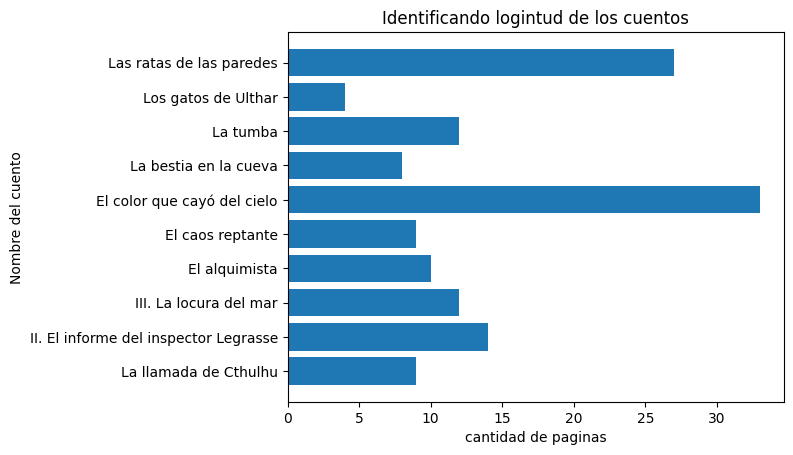

In [12]:
plt.barh(titulares,[len(x) for x in libro[1:]],)
plt.xlabel('cantidad de paginas')
plt.ylabel('Nombre del cuento')
plt.title('Identificando logintud de los cuentos')

**Nota:** En este caso escogeremos el texto mas extenso con el fin de tener mas caracteres, por ello el cuento a escoger sera *El color que cayo del cielo*

In [13]:
def Traducir_texto_a_numero(texto):
    traduccion =[]
    for palabra in texto:
      for caracter in palabra:
        try:
          traduccion +=[textoAentero[caracter]]
        except:
          traduccion +=[textoAentero[' ']]

    return traduccion

def Traducir_numero_a_texto(texto):
    traduccion =[]
    for caracter in texto:
      try:
        traduccion +=[enteroAtexto[caracter]]
      except:
        traduccion +=[enteroAtexto[86]]

    return traduccion



### Testeo de la funcion
*****

In [14]:
prueba = Traducir_texto_a_numero('Hola esto es una prueba')
print(prueba)
prueba2 = Traducir_numero_a_texto(prueba)
print(''.join(prueba2))

[7, 42, 38, 27, 86, 31, 46, 47, 42, 86, 31, 46, 86, 48, 40, 27, 86, 43, 45, 48, 31, 28, 27]
Hola esto es una prueba


### Traduccion del libro
*****

In [15]:
libro_numerico = Traducir_texto_a_numero(libro[6])
texto = Traducir_numero_a_texto(libro_numerico)

## Seccion 4: Divicion de datos
***
**Objetivo de esta seccion**
1. El objetivo de esta seccion es dividir la lista `libro_numerico` a *100* parrafos dentro de un tensor, que nor serviran como dataset; a su vez agregaremos otra lista con  una funcion  que se encargara de correr los parrafos un caracter; de tal forma que la nueva lista quede con un *shape (100,), (100,)* referente a los grupos de parrafos creados.

2. Con el tensor creado agregaremos una dimension extra la cual nos ayudara con los *memory cell*  del los LSTM de nuestro modelo, en conclusio se esperara tener un dataset con un sahpe de *(1,100) (1,100)*.

**¿Que se esperar de esta seccion?**
1. Creacion del tensor `dataset`
2. Creacion de la funcion para mover un caracter los parrfaos bajo el nombre de `Mover_una_posicion`.
3. Division del texto en parrafos y creacion de un gupo similar conun carcter corrido.
4. Creacion de una nueva dimension en el dataset referente a los *memory cell*



Creacion de tensores para los parrafos
***

In [16]:
char_dataset= tf.data.Dataset.from_tensor_slices(libro_numerico)
seq_logitud = 100
sequence = char_dataset.batch(seq_logitud+1,drop_remainder=True)

In [17]:
for items in sequence.take(10):
    print(''.join(Traducir_numero_a_texto(items.numpy())))

El color que cayó del cielo
Al Oeste de Arkham las colinas se yerguen selváticas, y hay valles con
pr
ofundos bosques, en los cuales no ha resonado nunca el ruido de un
hacha. Hay angostas y oscuras caña
das donde los árboles se inclinan
fantásticamente, y donde discurren estrechos arroyuelos que nunca h
an
captado el reflejo de la luz del sol. En las laderas menos agrestes hay
casas de labor, antiguas y
 rocosas, con edificaciones cubiertas de musgo,
rumiando eternamente en los misterios de la Nueva Ing
laterra; pero
todas ellas están ahora vacías, con las amplias chimeneas
desmoronándose y las paredes 
pandeándose debajo de los techos a la
holandesa.
Sus antiguos moradores se marcharon, y a los extranj
erosno les gusta
vivir allí. Los francocanadienses lo han intentado, los italianos lo han
intentado, 
y los polacos llegaron y se marcharon. Y ello no es debido a
nada que pueda ser oído, o visto, o toca
do, sino a causa de algo
puramente imaginario. El lugar no es bueno para la imagin

In [18]:
def Mover_una_posicion(chunk):
  input_text = chunk[:-1]
  target_text=chunk[1:]
  return input_text,target_text

In [19]:
dataset = sequence.map(Mover_una_posicion)
print(dataset)

<_MapDataset element_spec=(TensorSpec(shape=(100,), dtype=tf.int32, name=None), TensorSpec(shape=(100,), dtype=tf.int32, name=None))>


In [20]:
for input_t,target_t in dataset.take(1):
  print(f"texto de entrada: {''.join(Traducir_numero_a_texto(input_t.numpy()))}")
  print('\n')
  print(f"Text objetivo:{''.join(Traducir_numero_a_texto(target_t.numpy()))}")

texto de entrada: El color que cayó del cielo
Al Oeste de Arkham las colinas se yerguen selváticas, y hay valles con
p


Text objetivo:l color que cayó del cielo
Al Oeste de Arkham las colinas se yerguen selváticas, y hay valles con
pr


In [21]:
print(dataset)

<_MapDataset element_spec=(TensorSpec(shape=(100,), dtype=tf.int32, name=None), TensorSpec(shape=(100,), dtype=tf.int32, name=None))>


Creacion de la nueva dimension
******

In [22]:
Batch_size=1
Buffer_size=1000
dataset = dataset.shuffle(Buffer_size).batch(Batch_size,drop_remainder=True)

**Nota:** Se puede cambiar el *batch_size* a un valor distinto a uno y esto ayudara generar mas memory cell cuando se cree el modelo, sin embargo, se deberar tener en cuenta que cada dimension es como un parrafo entonces si por ejemplo se tiene un *batch_size* de 10 se esperaran diez palabras en vez de una.

In [23]:
print(dataset)

<_BatchDataset element_spec=(TensorSpec(shape=(1, 100), dtype=tf.int32, name=None), TensorSpec(shape=(1, 100), dtype=tf.int32, name=None))>


## Seccion 5: Creacion del modelo
****
**Objetivo de esta seccion**

En esta seccion crearemos el modelo haciendo uso de del LSTM y los Embedding, donde esperaremos una entrada del tipo *(1,None)* donde en palabras simple, estamos hablando de que esperamos una palabra (o frase) con x cantidad de caracteres y de salida obtendremos *(1,None,87)* lo que significa que tendremos un frase o parrafo de x cantidad de caracteres y su respectivo diccionario de 87 caracteres traucidos.

**¿Que se espera de esta seccion?**
1. La creacion del modelo `RNN_Craft`
2. la compilacion del modelo
3. el entrenamiento del modelo

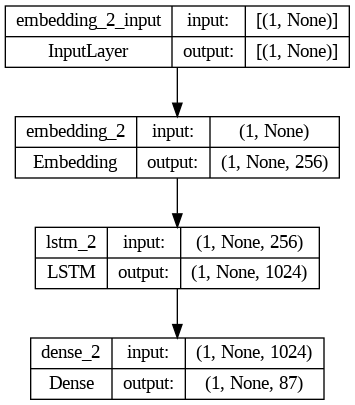

In [35]:
RNN_Carft = kr.Sequential([
    kr.layers.Embedding(len(enteroAtexto),256,batch_input_shape=[Batch_size,None]),
    kr.layers.LSTM(1024,return_sequences=True,stateful=True,recurrent_initializer='glorot_uniform'),
    kr.layers.Dense(len(enteroAtexto))
])

kr.utils.plot_model(RNN_Carft,show_shapes=True)

In [ ]:
kr.layesr

**Nota:** ahora definiremos los atributos presentes en el modelo, por cada una de las capas.

**Embedding:**
*****
1. `batch_input_shape` es la variable que define la dimensiones de un espacio extra, donde se almacenra informacion creada por la red neuronal; para este caso nos serivra para definir el espacio de las *memory cell*.

2. `input_dim` Hace referencia al numero total de caracteres presente en el diccionario ( *que en nuestro caso es `enteroAtexto`*)

3. `units` Numero de neuronas para el embedding

**LSTM**
****
1. `units` es la catidad de neuronas de LSTM
2. `return_sequences` hace refrencia de que si es necesario tener encuenta TODOS los datos que han pasado por la neurona
3. `recurrent_initializer` es la forma de definir los pesos segun una dsitribucion
3. `stateful` hace referencia al uso de *memory cell*, en este caso nos refiera que si hay espacio para el almacen de cada dato (*para nuestro caso tenermos un memory cell de 1 para cada caracter, el cual es el que hemos definimos en el embedding [`batch_input_shape`]*)  



In [36]:
#compilacion
def Loss(label,logit):
  return kr.losses.sparse_categorical_crossentropy(label,logit,from_logits=True)

**Nota 2:** Para este caso dado que el modelo esta prediciendo cual es el caracter posterior dentro de una posibilidad de 87 caracteres usaremos la metrica de perdida de *sparse categorical crossentropy*; no obstante, esta metrica esperara variables entre 1 y 0, y nuestro modelo regresa variables entre 0 y 87, para ello usamos el atributo `from_logits` que nos permite evaluar numeros naturales

In [37]:
RNN_Carft.compile('adam',loss=Loss)

In [38]:
hist =RNN_Carft.fit(dataset,epochs=50,verbose=2)

Epoch 1/50
714/714 - 18s - loss: 2.3254 - 18s/epoch - 26ms/step
Epoch 2/50
714/714 - 15s - loss: 1.8480 - 15s/epoch - 22ms/step
Epoch 3/50
714/714 - 15s - loss: 1.5973 - 15s/epoch - 21ms/step
Epoch 4/50
714/714 - 16s - loss: 1.4184 - 16s/epoch - 22ms/step
Epoch 5/50
714/714 - 15s - loss: 1.2803 - 15s/epoch - 21ms/step
Epoch 6/50
714/714 - 15s - loss: 1.1612 - 15s/epoch - 21ms/step
Epoch 7/50
714/714 - 16s - loss: 1.0482 - 16s/epoch - 22ms/step
Epoch 8/50
714/714 - 16s - loss: 0.9338 - 16s/epoch - 23ms/step
Epoch 9/50
714/714 - 15s - loss: 0.8236 - 15s/epoch - 21ms/step
Epoch 10/50
714/714 - 15s - loss: 0.7159 - 15s/epoch - 22ms/step
Epoch 11/50
714/714 - 16s - loss: 0.6195 - 16s/epoch - 22ms/step
Epoch 12/50
714/714 - 16s - loss: 0.5302 - 16s/epoch - 22ms/step
Epoch 13/50
714/714 - 15s - loss: 0.4642 - 15s/epoch - 21ms/step
Epoch 14/50
714/714 - 15s - loss: 0.4075 - 15s/epoch - 21ms/step
Epoch 15/50
714/714 - 15s - loss: 0.3618 - 15s/epoch - 21ms/step
Epoch 16/50
714/714 - 16s - loss: 

## Seccion 6: Testear el modelo
***
implementa una función para generar texto utilizando un modelo de lenguaje. Dado un modelo, una palabra inicial y parámetros como temperatura, produce una secuencia de texto concatenada a la palabra inicial. Utiliza la predicción del modelo y la aleatoriedad para diversificar la generación.



In [31]:
def Generar_texto(modelo,Palabra,caracteres_max_generados=500,temperatura=0.5):

  input_eval = Traducir_texto_a_numero(Palabra)
  input_eval=tf.expand_dims(input_eval,0)

  texto_generado =[]
  modelo.reset_states()
  for i in range(caracteres_max_generados):
      prediccion = modelo(input_eval)

      prediccion = tf.squeeze(prediccion,0)
      prediccion = prediccion/temperatura
      prediccion_id = tf.random.categorical(prediccion,num_samples=1)[-1,0].numpy()

      #Agregar el nuevo caracter
      input_eval=tf.expand_dims([prediccion_id],0)
      texto_generado +=[enteroAtexto[prediccion_id]]

  return (Palabra +''.join(texto_generado))





In [43]:
Generar_texto(RNN_Carft,'Era de noche  y yo veia  ',temperatura=0.55,caracteres_max_generados=100)

'Era de noche  y yo veia  Dios mío   Qué antigua era la casa  La mayor parte\nde ella edificada a\nla granja presencia una para '

## Seccion 7: Guardar el modelo
****
En esta seccion guardaremos el modelo en un archivo .h5 y el el diccionario en un .json

In [49]:
! mkdir Modelo_Guardado

In [50]:
RNN_Carft.save('Modelo_Guardado/Rnn_craft.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [51]:
import json

with open('Modelo_Guardado/numero_a_texto.json','w') as file:
  json.dump(enteroAtexto,file)



with open('Modelo_Guardado/texto_a_numero.json','w') as file:
  json.dump(textoAentero,file)